## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [30]:
df =pd.read_csv("./data/stud.csv")

#### show top 5 records

In [31]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape

In [32]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [33]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [34]:
df.duplicated().sum()

0

In [35]:
df[df.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


#### There are no duplicate values in the data set

### 3.3 Check data types

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check the number of unique values of each column


In [37]:
df.nunique(axis=0)

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [38]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.6 Check various categories present in the different categorical column

In [39]:

categorical_features =df.select_dtypes(include="object").columns
numerical_features =df.select_dtypes(include=["int64","float64"]).columns

In [40]:
print("No. of Categorical features : ",len(categorical_features),categorical_features)
print("No. of Numerical features : ",len(numerical_features),numerical_features)

No. of Categorical features :  5 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')
No. of Numerical features :  3 Index(['math_score', 'reading_score', 'writing_score'], dtype='object')


In [41]:
for col in categorical_features:
    print(f"Categories in {col} : {df[col].unique()}",end="\n\n")

Categories in gender : ['female' 'male']

Categories in race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch : ['standard' 'free/reduced']

Categories in test_preparation_course : ['none' 'completed']



In [42]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3.8 Adding columns for "Total Score" and "Average"

In [43]:
df['total_score']  =df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [44]:
reading_full  =df[df['reading_score']==100]['average_score'].count()
writing_full  =df[df['writing_score']==100]['average_score'].count()
math_full  =df[df['math_score']==100]['average_score'].count()

print(f"Number of Students with full marks in reading : {reading_full}")
print(f"Number of Students with full marks in writing : {writing_full}")
print(f"Number of Students with full marks in maths : {math_full}")


Number of Students with full marks in reading : 17
Number of Students with full marks in writing : 14
Number of Students with full marks in maths : 7


In [45]:
reading_full  =df[df['reading_score']<=20]['average_score'].count()
writing_full  =df[df['writing_score']<=20]['average_score'].count()
math_full  =df[df['math_score']<=20]['average_score'].count()

print(f"Number of Students with marks less than 20 in reading : {reading_full}")
print(f"Number of Students with marks less than 20 in writing : {writing_full}")
print(f"Number of Students with marks less than 20 in maths : {math_full}")


Number of Students with marks less than 20 in reading : 1
Number of Students with marks less than 20 in writing : 3
Number of Students with marks less than 20 in maths : 4


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

<Axes: xlabel='average_score', ylabel='Count'>

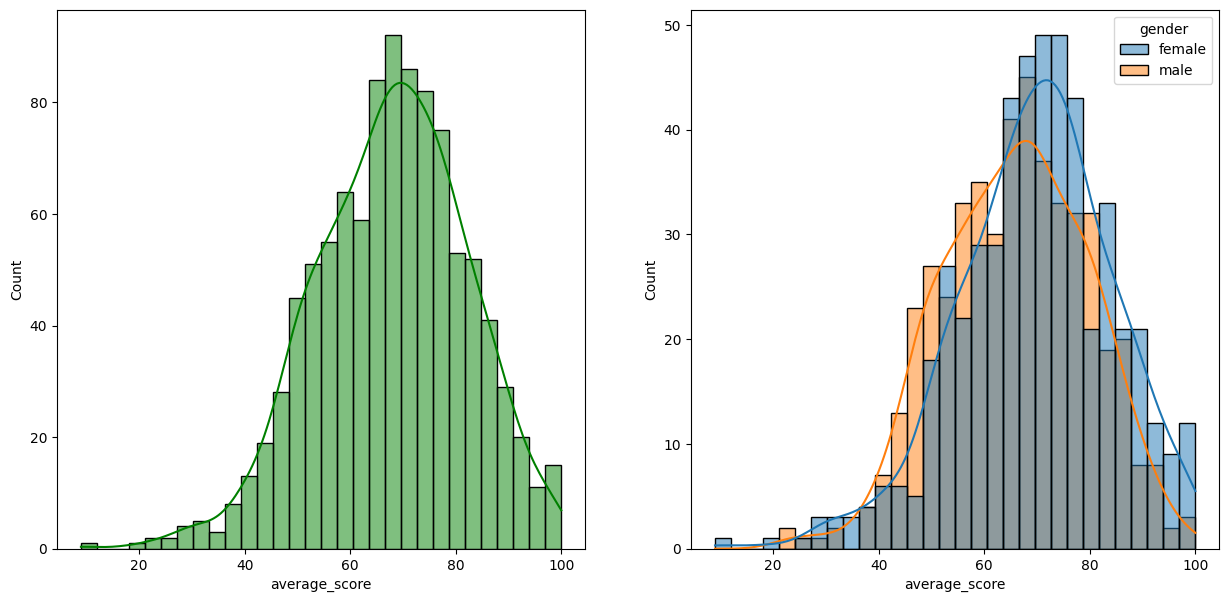

In [46]:
fig,axs =plt.subplots(1,3,figsize=(15,7))
plt.subplot(121)
sns.histplot(df,x='average_score',kde=True,color='g',bins=30 )
plt.subplot(122)
sns.histplot(df,x='average_score',kde=True,color='green',bins=30,hue="gender" )

<Axes: xlabel='total_score', ylabel='Count'>

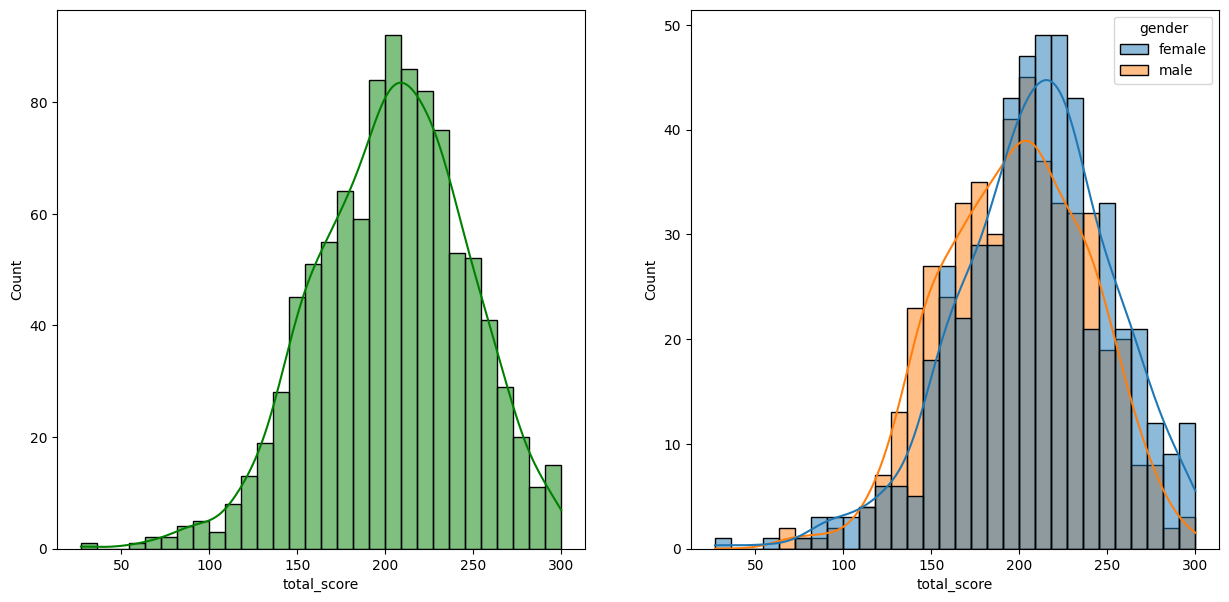

In [47]:
fig,axs =plt.subplots(1,3,figsize=(15,7))
plt.subplot(121)
sns.histplot(df,x='total_score',kde=True,color='g',bins=30 )
plt.subplot(122)
sns.histplot(df,x='total_score',kde=True,color='green',bins=30,hue="gender" )

#####  Insights
- Female students tend to perform well then male students.

In [48]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

<Axes: xlabel='average_score', ylabel='Count'>

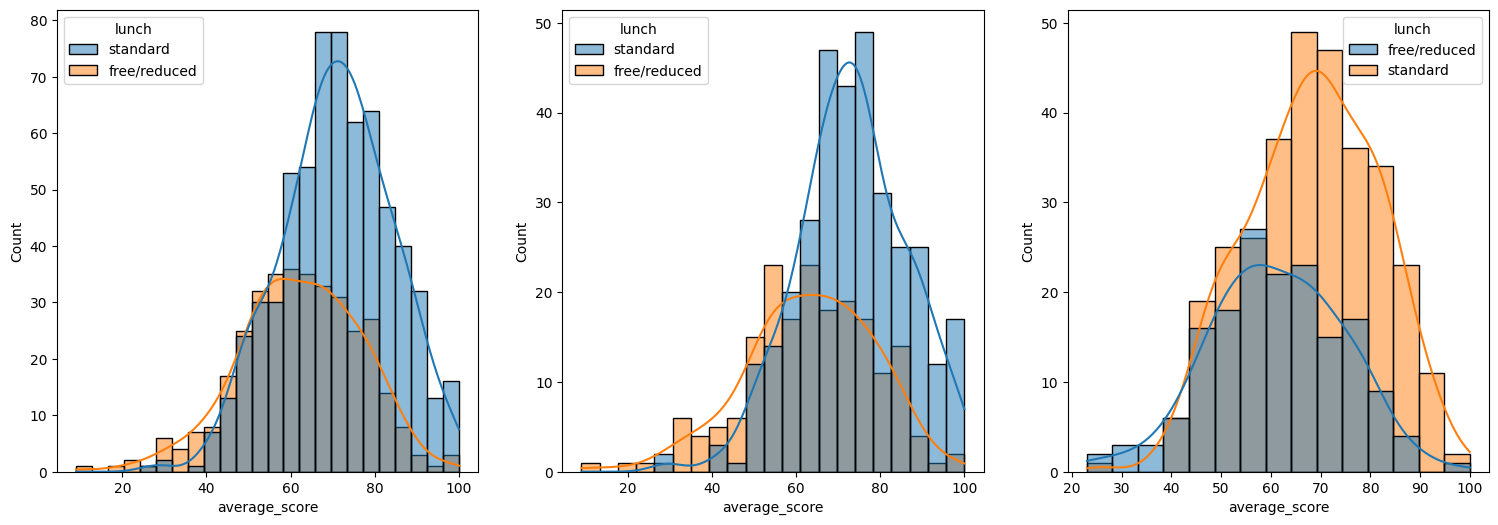

In [49]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average_score",hue='lunch',color="g",kde=True)
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x="average_score",hue="lunch",color="orange",kde=True)
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x="average_score",hue="lunch",color="purple",kde=True)    

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [50]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

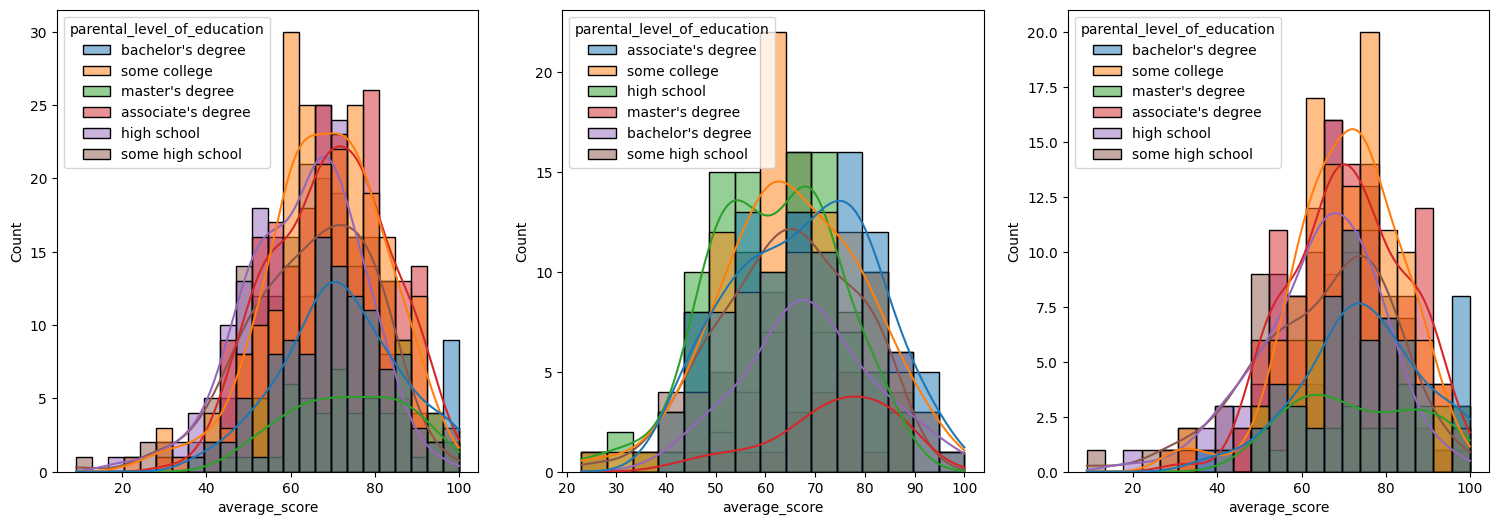

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [52]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


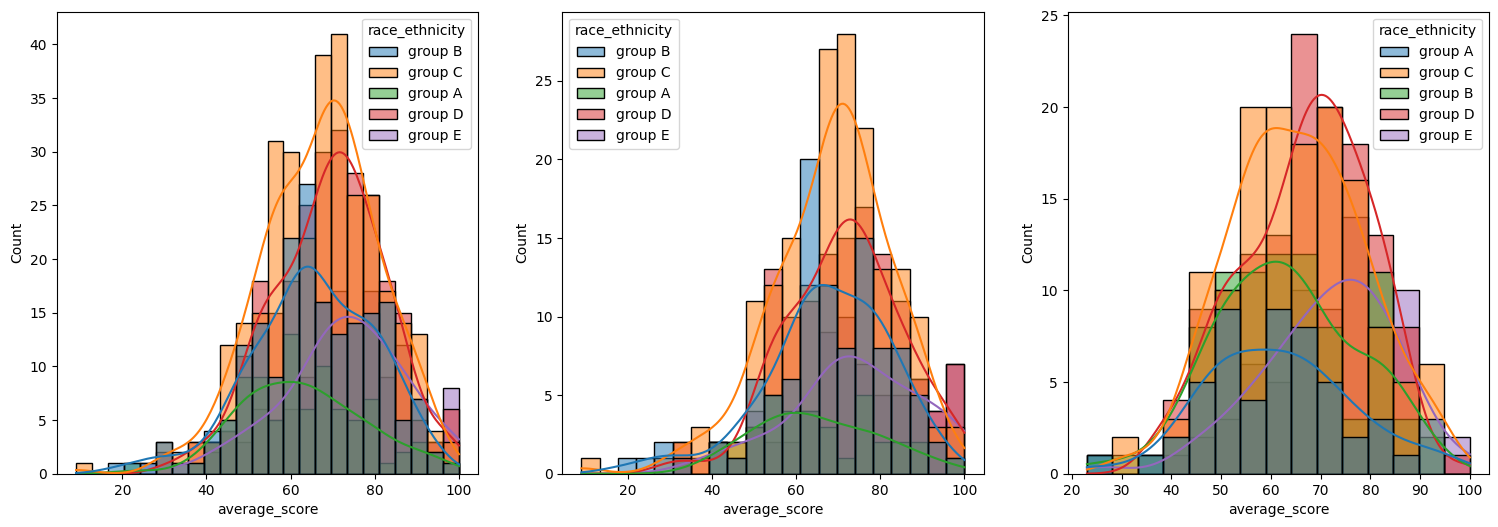

In [53]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

<Axes: title={'center': 'Writing score'}, ylabel='writing_score'>

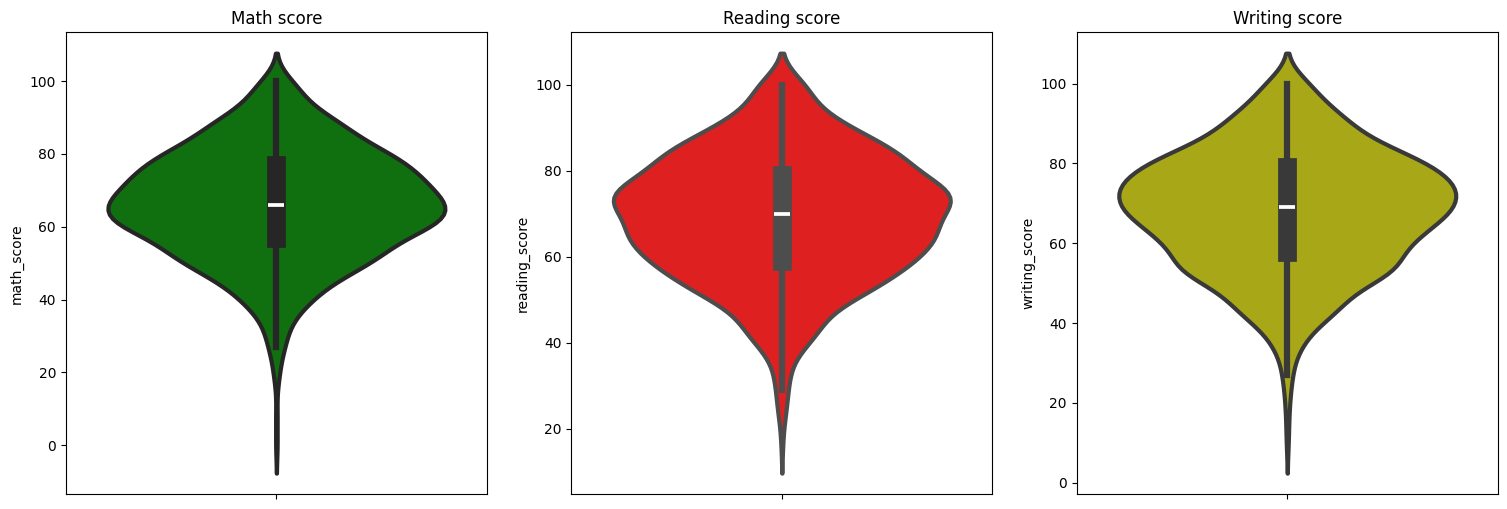

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
plt.title("Math score")
sns.violinplot(data=df,y="math_score",color="g",linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading score")
sns.violinplot(data=df,y="reading_score",color="r",linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing score")
sns.violinplot(data=df,y="writing_score",color="y",linewidth=3)

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

In [55]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

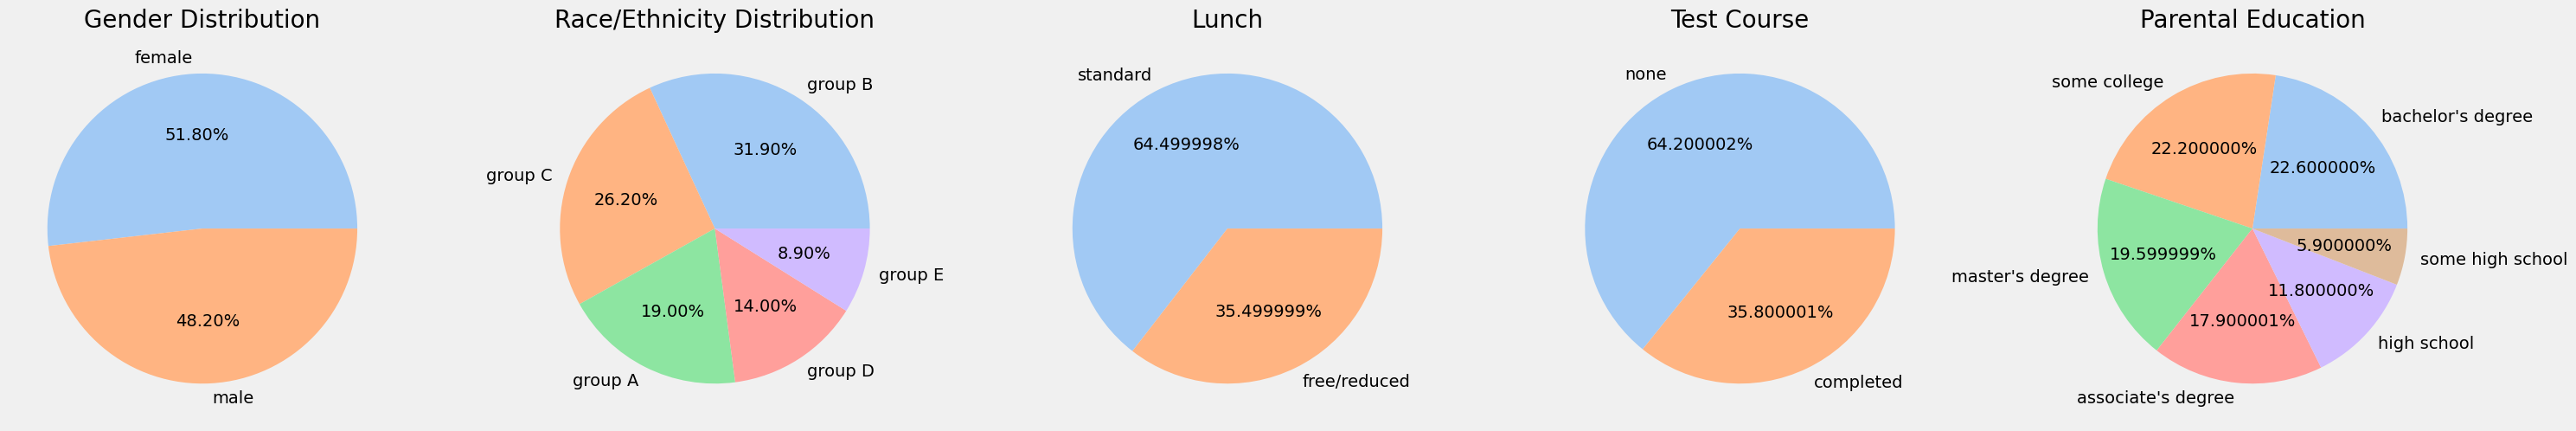

In [74]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size =df['gender'].value_counts()
labels =df['gender'].unique()
color =sns.color_palette('pastel')[0:len(labels)]

plt.pie(size,labels=labels,colors=color,autopct="%.2f%%")
plt.title("Gender Distribution",fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size =df['race_ethnicity'].value_counts()
labels =df['race_ethnicity'].unique()
color =sns.color_palette('pastel')[0:5]

plt.pie(size,labels=labels,colors=color,autopct="%.2f%%")
plt.title("Race/Ethnicity Distribution",fontsize=20 )
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = df['lunch'].unique()
color = sns.color_palette('pastel')[0:len(labels)]

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = df['test_preparation_course'].unique()
color = sns.color_palette('pastel')[0:len(labels)]

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = df['parental_level_of_education'].unique()
color = sns.color_palette('pastel')[0:len(labels)]


plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group B
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Bachelor's Degree" is greater followed closely by "Some College"

### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

In [57]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2565cc2b790>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06782226650507357, -1.1980818587083752, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

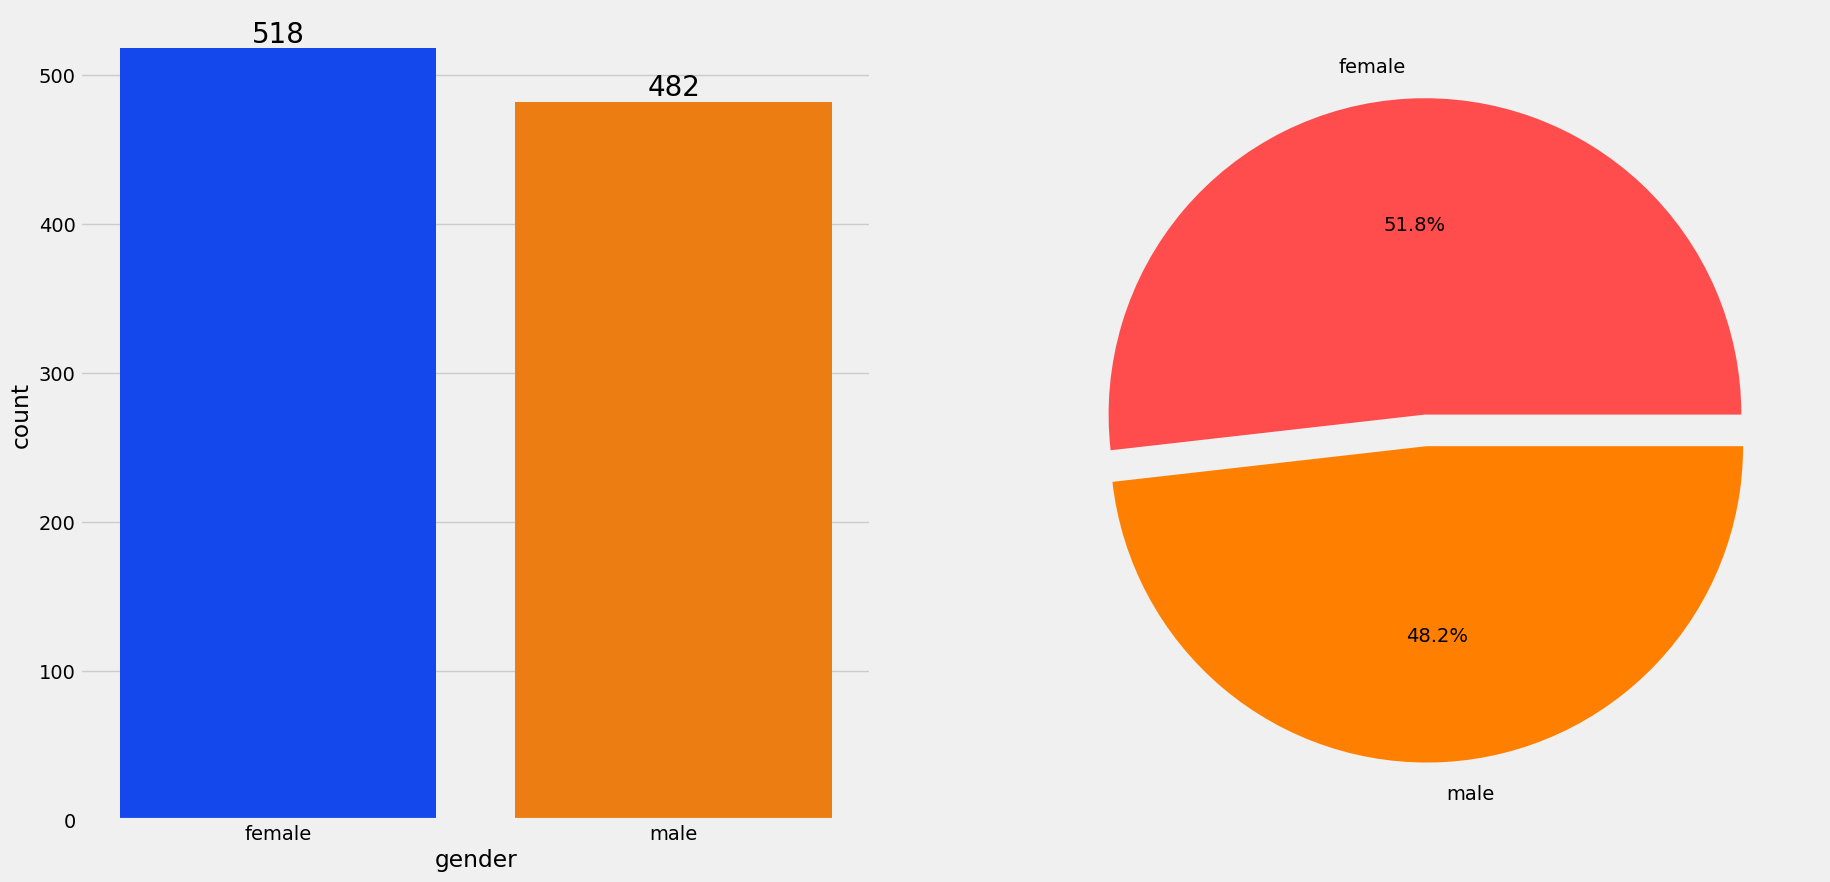

In [78]:
f,ax =plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x=df['gender'],palette='bright',ax=ax[0],saturation=0.85)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=df['gender'].unique(),explode=[0,0.1],autopct='%1.1f%%',colors=['#ff4d4d','#ff8000'])


#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [59]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

In [60]:
gender_gropup =df.groupby('gender')


In [61]:
gender_gropup['average_score'].mean(),gender_gropup['math_score'].mean(),


(gender
 female    69.569498
 male      65.837483
 Name: average_score, dtype: float64,
 gender
 female    63.633205
 male      68.728216
 Name: math_score, dtype: float64)

In [80]:
gender_gropup['average_score'].mean()

gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64

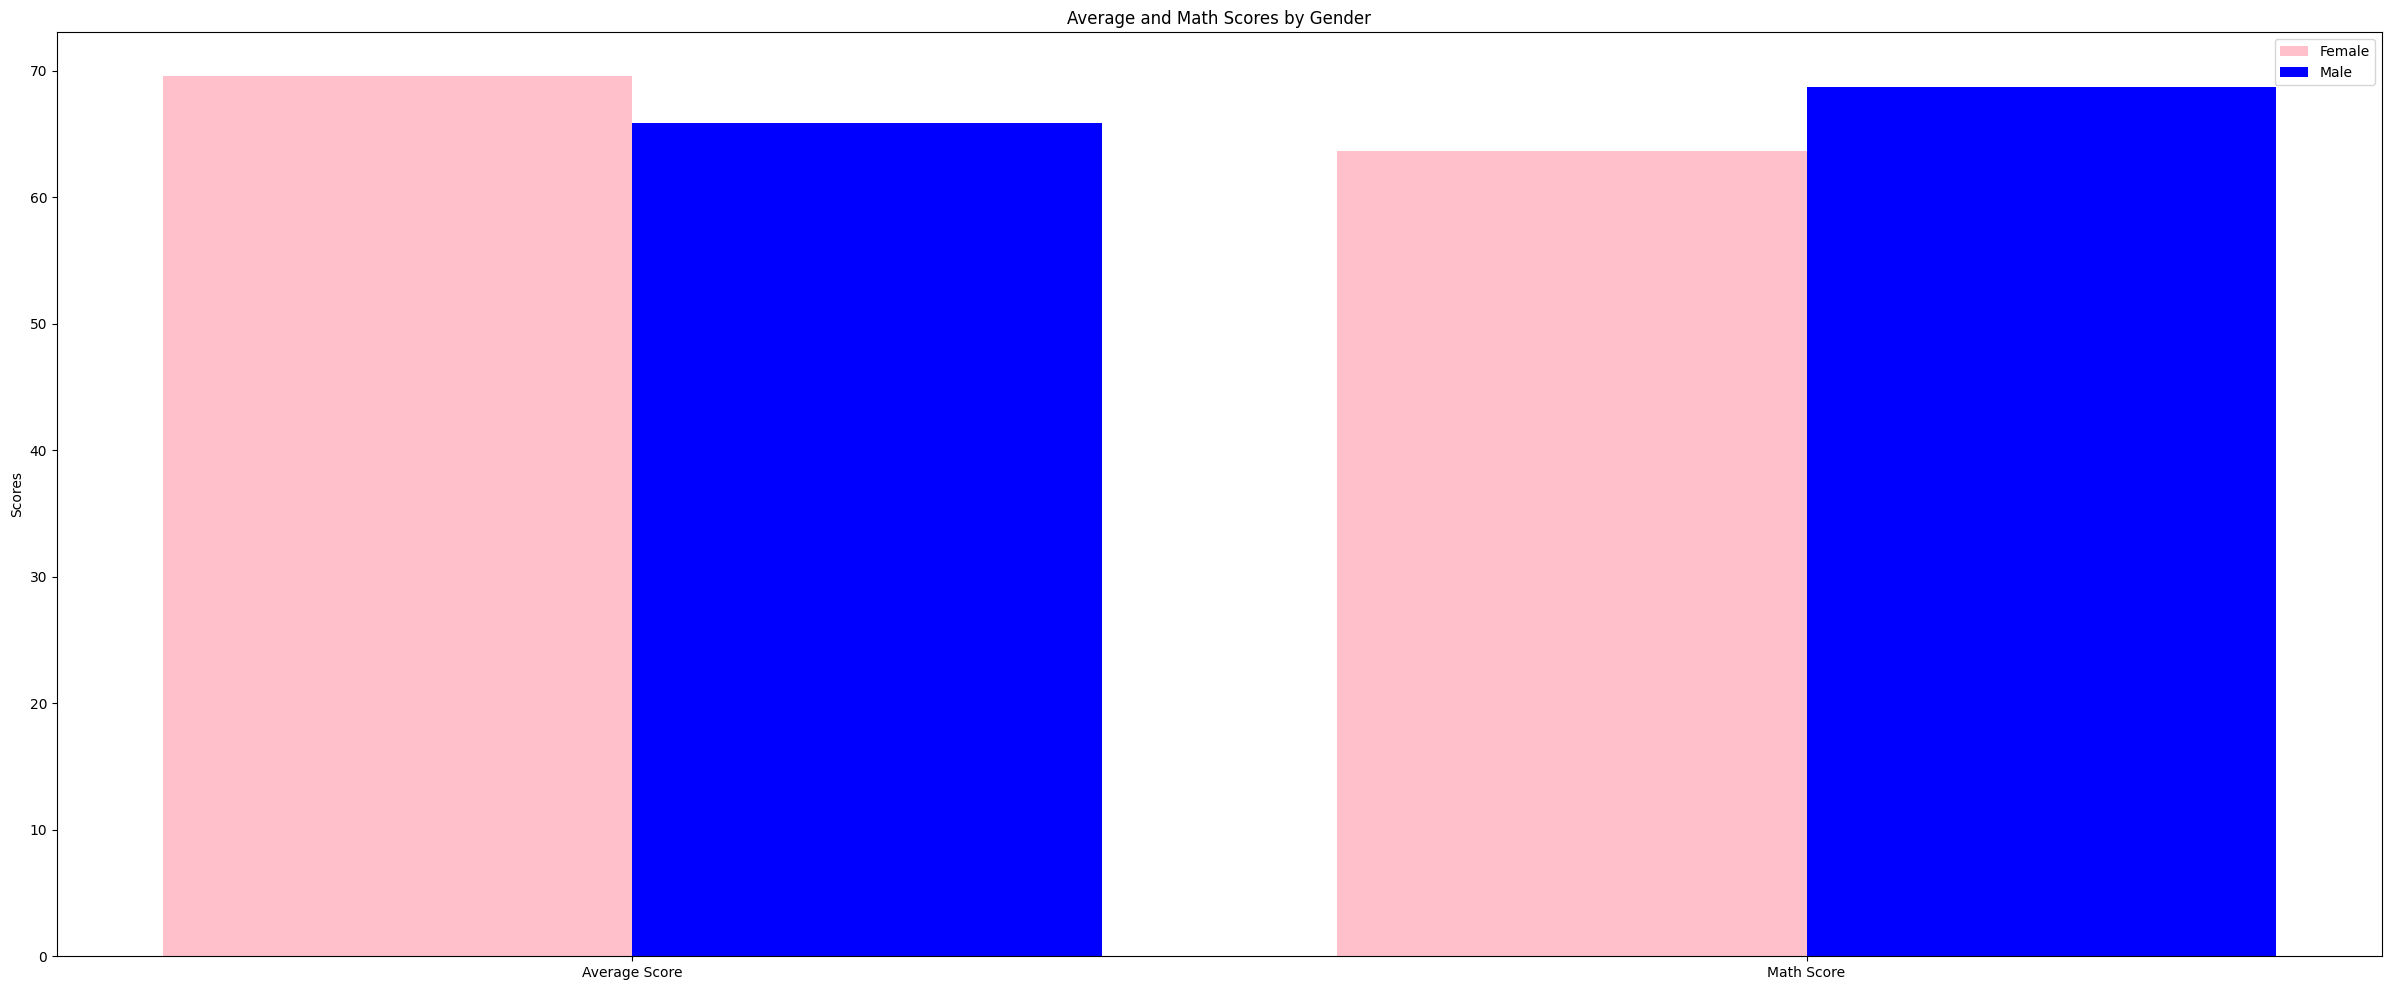

In [62]:
female_scores =[gender_gropup['average_score'].mean()[0],gender_gropup['math_score'].mean()[0]]

male_scores =[gender_gropup['average_score'].mean()[1],gender_gropup['math_score'].mean()[1]]

X =['Average Score','Math Score']

X_axis =np.arange(len(X))
plt.bar(X_axis -0.2 ,female_scores,0.4,label='Female',color='pink')
plt.bar(X_axis +0.2,male_scores,0.4,label='Male',color='blue')

plt.xticks(X_axis,X)
plt.ylabel('Scores')
plt.title('Average and Math Scores by Gender')
plt.legend()    
plt.show()


#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

In [63]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x2565ca18160>,
 [Text(0.6461719988148862, 1.0111685062083247, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3769336659753503, 0.5898482952881894, '31.9%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.2%'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.0%'),
  Text(0.32467274541824787, -0.5045667531482604, '14.0%'),
  Text(0.5766992522671516, -0.1655837323969605, '8.9%')])

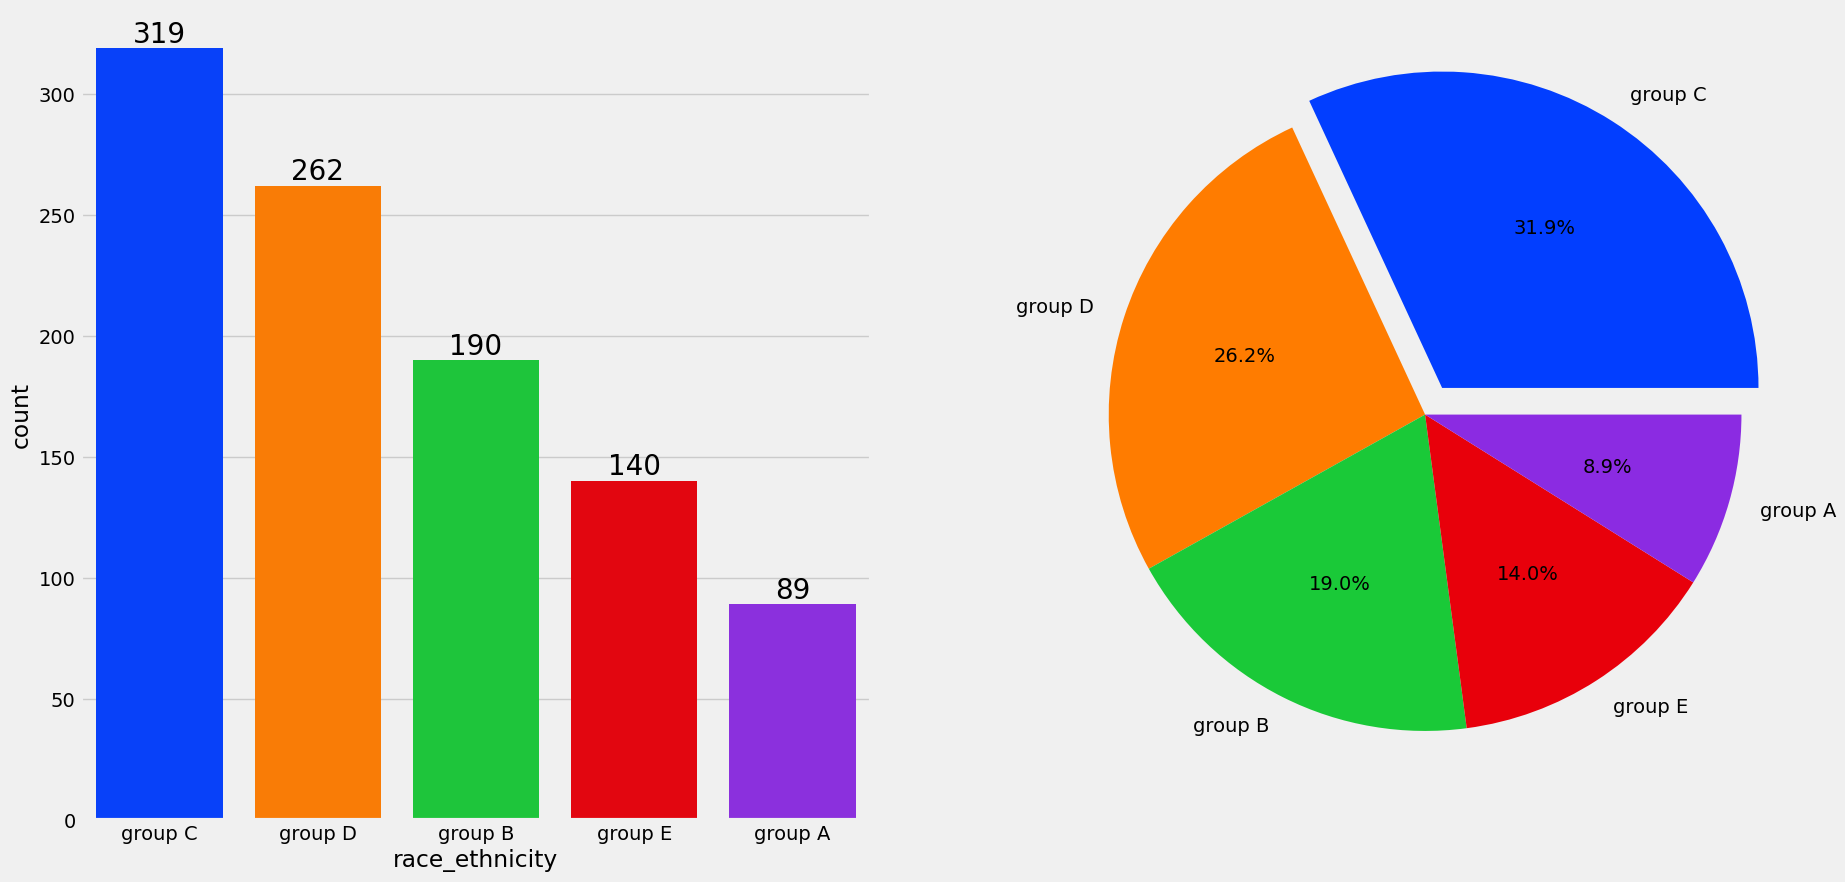

In [84]:
f,ax =plt.subplots(1,2,figsize=(20,10))
labels =df['race_ethnicity'].value_counts().index
sns.countplot(data=df,x='race_ethnicity',palette='bright',ax=ax[0],saturation=0.95,order=labels)


for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=labels,autopct='%1.1f%%',colors=sns.color_palette('bright')[0:len(df['race_ethnicity'].unique())],explode=[0.1,0,0,0,0])

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

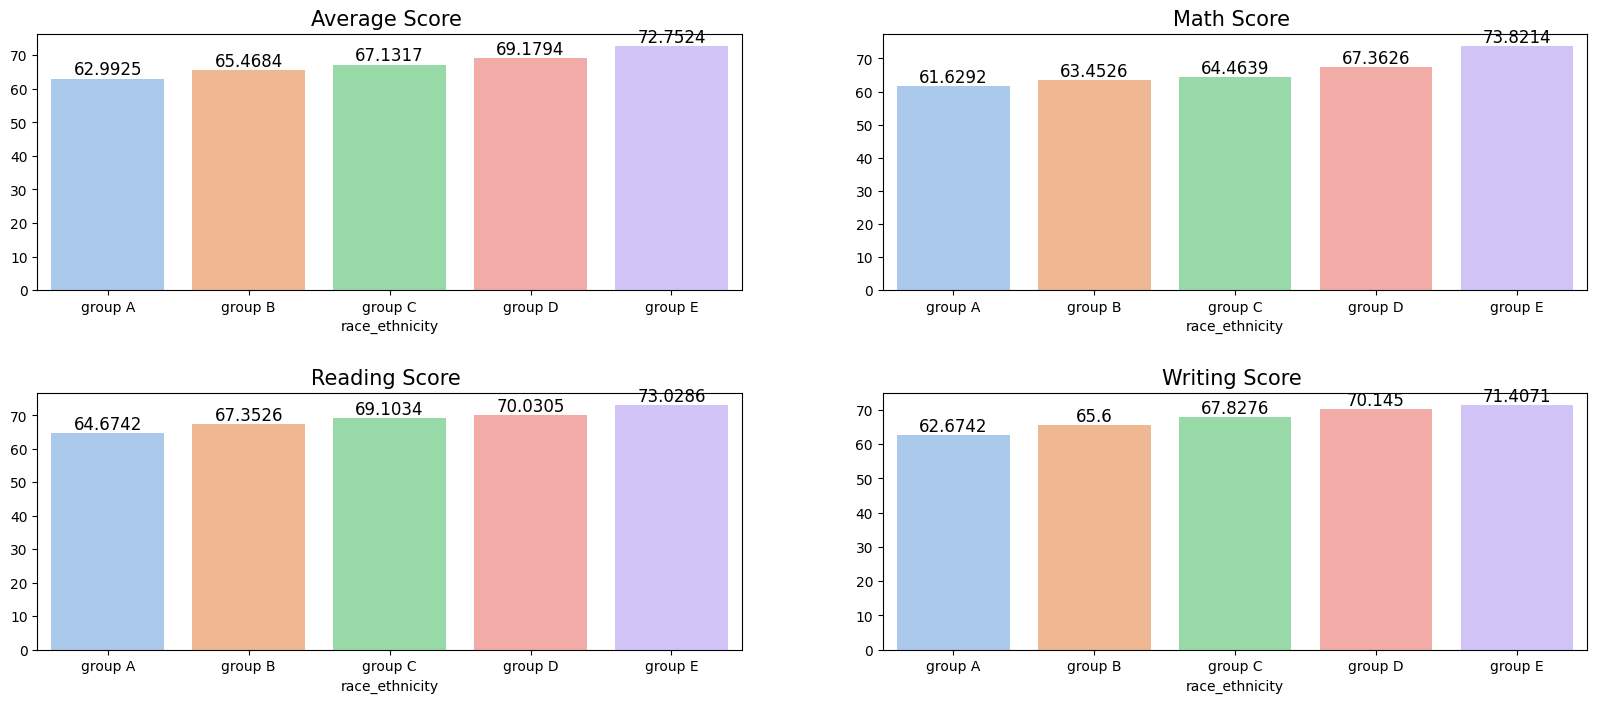

In [65]:
Group =df.groupby('race_ethnicity')

d,ax =plt.subplots(2,2,figsize=(20,8))
sns.barplot(x =Group['average_score'].mean().index,y=Group['average_score'].mean().values,palette='pastel',ax=ax[0][0])
ax[0][0].set_title('Average Score ',color='black',fontsize=15)

for container in ax[0][0].containers:
    ax[0][0].bar_label(container,color='black',size=12)

sns.barplot(x=Group['math_score'].mean().index,y=Group['math_score'].mean().values,palette ='pastel',ax =ax[0][1])
ax[0][1].set_title('Math Score ',color='black',fontsize=15)

for container in ax[0][1].containers:
    ax[0][1].bar_label(container,color='black',size=12)

sns.barplot(x=Group['reading_score'].mean().index,y=Group['reading_score'].mean().values,palette ='pastel',ax =ax[1][0])
ax[1][0].set_title('Reading Score ',color='black',fontsize=15)

for container in ax[1][0].containers:
    ax[1][0].bar_label(container,color='black',size=12)

sns.barplot(x=Group['writing_score'].mean().index,y=Group['writing_score'].mean().values,palette ='pastel',ax =ax[1][1])
ax[1][1].set_title('Writing Score ',color='black',fontsize=15)

for container in ax[1][1].containers:
    ax[1][1].bar_label(container,color='black',size=12)


plt.subplots_adjust(hspace=0.4)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

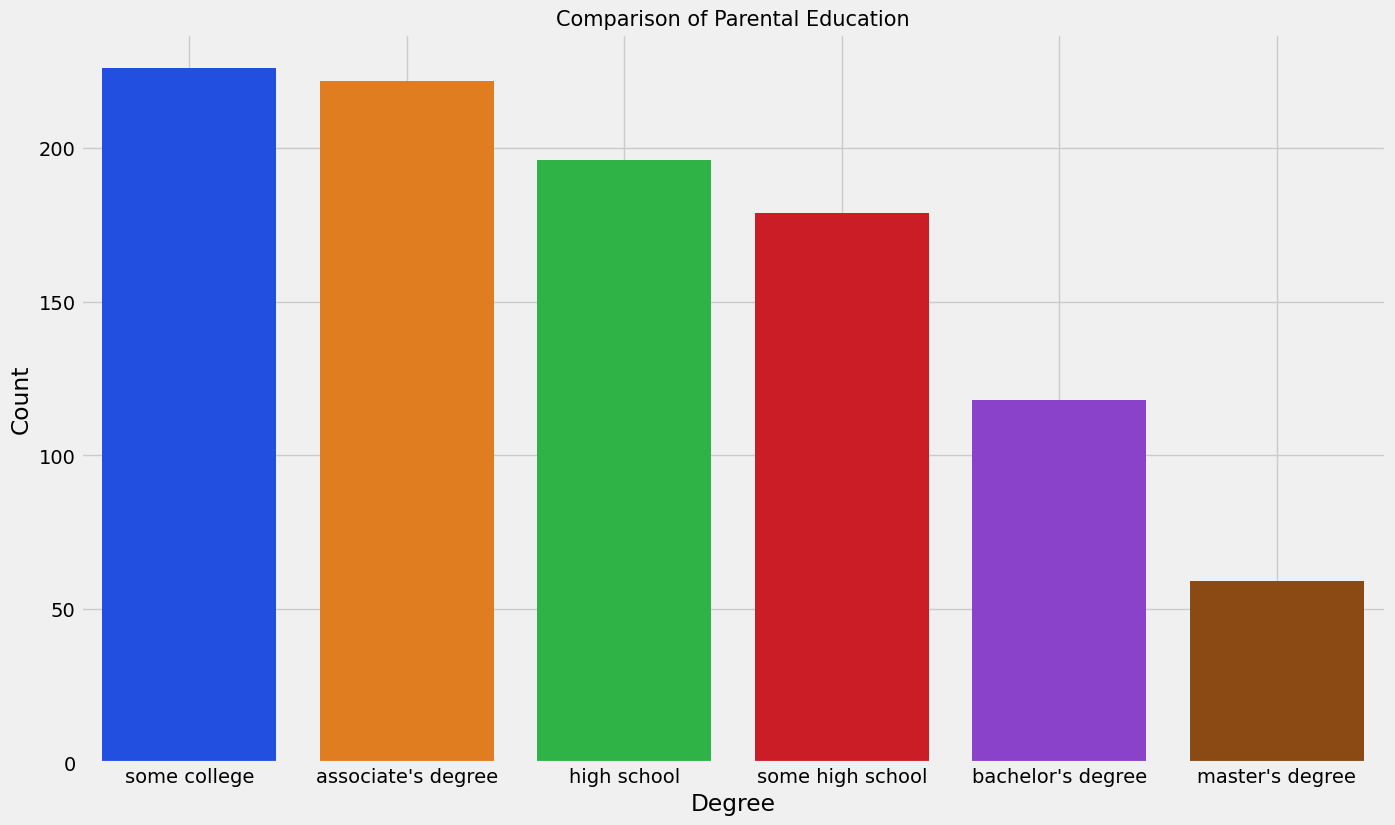

In [88]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')

labels =df['parental_level_of_education'].value_counts().index

sns.countplot(x=df['parental_level_of_education'],palette='bright',order=labels)

plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 15)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.grid(True)


#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

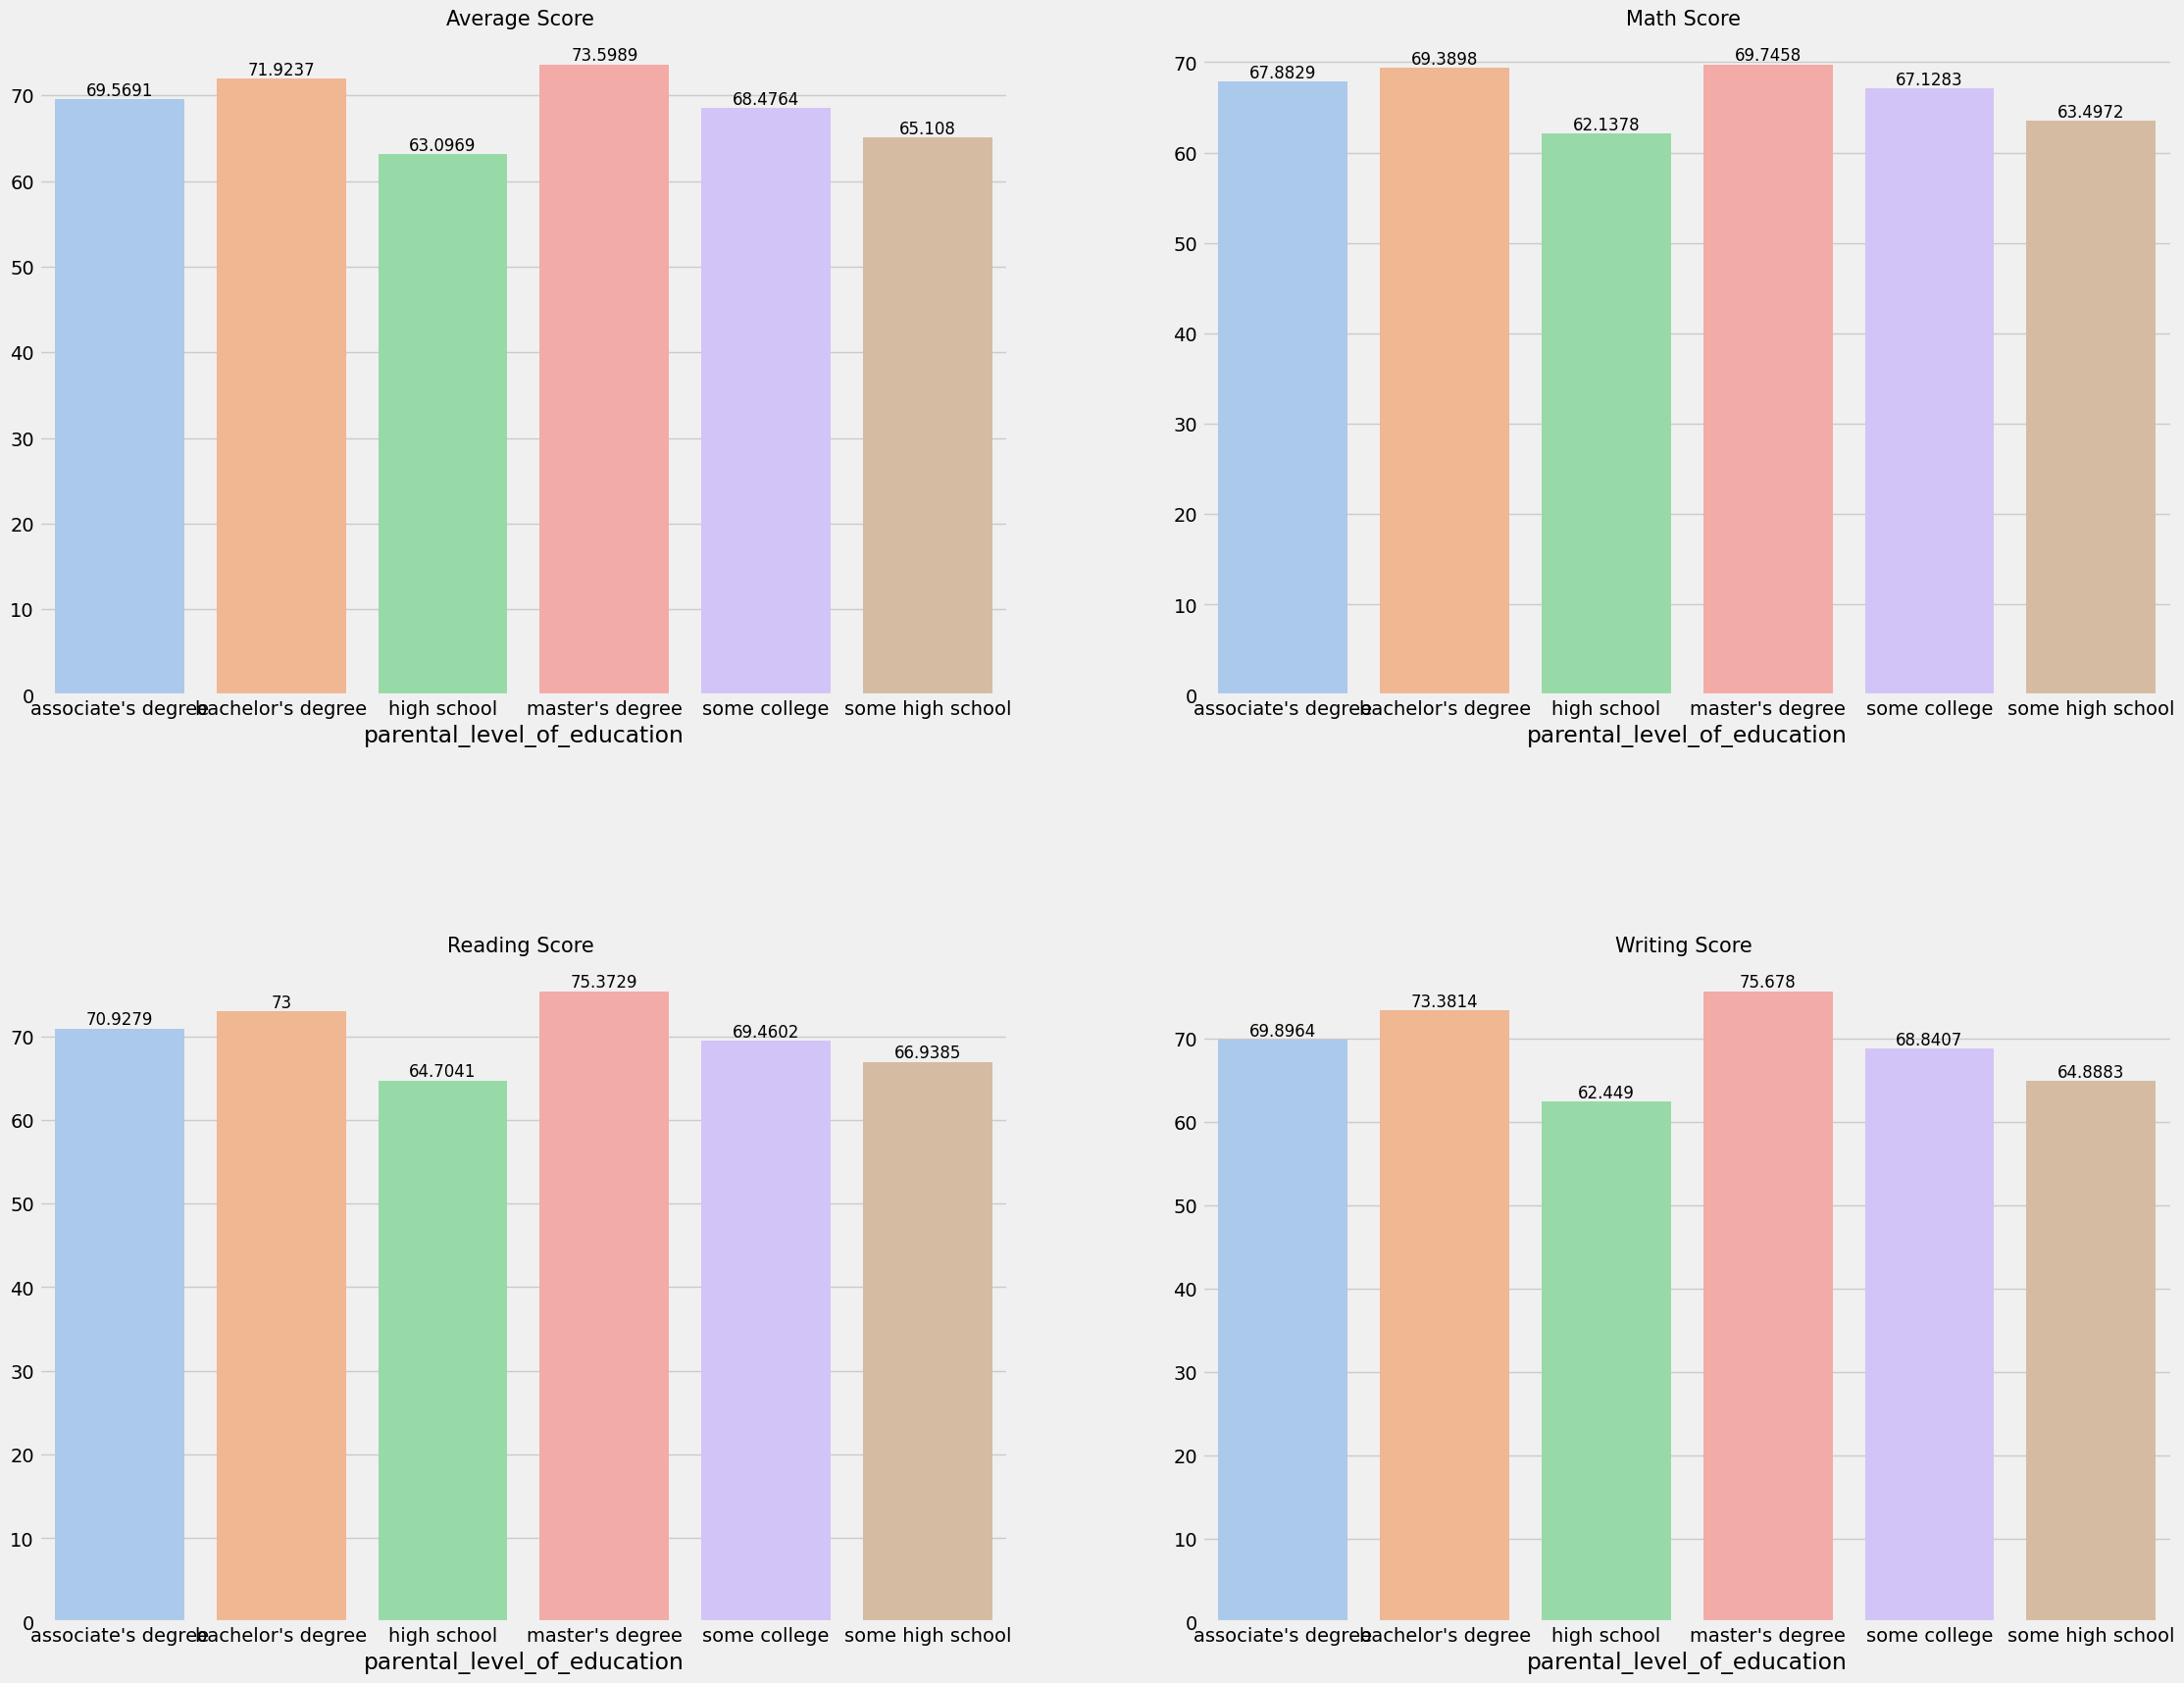

In [67]:
group =df.groupby('parental_level_of_education')

d,ax =plt.subplots(2,2,figsize=(25,20))
sns.barplot(x =group['average_score'].mean().index,y=group['average_score'].mean().values,palette='pastel',ax=ax[0][0])
ax[0][0].set_title('Average Score ',color='black',fontsize=15)

for container in ax[0][0].containers:
    ax[0][0].bar_label(container,color='black',size=12)

sns.barplot(x=group['math_score'].mean().index,y=group['math_score'].mean().values,palette ='pastel',ax =ax[0][1])
ax[0][1].set_title('Math Score ',color='black',fontsize=15)

for container in ax[0][1].containers:
    ax[0][1].bar_label(container,color='black',size=12)

sns.barplot(x=group['reading_score'].mean().index,y=group['reading_score'].mean().values,palette ='pastel',ax =ax[1][0])
ax[1][0].set_title('Reading Score ',color='black',fontsize=15)

for container in ax[1][0].containers:
    ax[1][0].bar_label(container,color='black',size=12)

sns.barplot(x=group['writing_score'].mean().index,y=group['writing_score'].mean().values,palette ='pastel',ax =ax[1][1])
ax[1][1].set_title('Writing Score ',color='black',fontsize=15)

for container in ax[1][1].containers:
    ax[1][1].bar_label(container,color='black',size=12)


plt.subplots_adjust(hspace=0.4)



#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?



#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

([<matplotlib.patches.Wedge at 0x2565d974790>,
 [Text(-0.5279269392541106, 1.0776331225467166, 'standard'),
  Text(0.48393293516224545, -0.9878304076435662, 'free/reduced')],
 [Text(-0.3079573812315645, 0.6286193214855846, '64.5%'),
  Text(0.2639634191794066, -0.5388165859873997, '35.5%')])

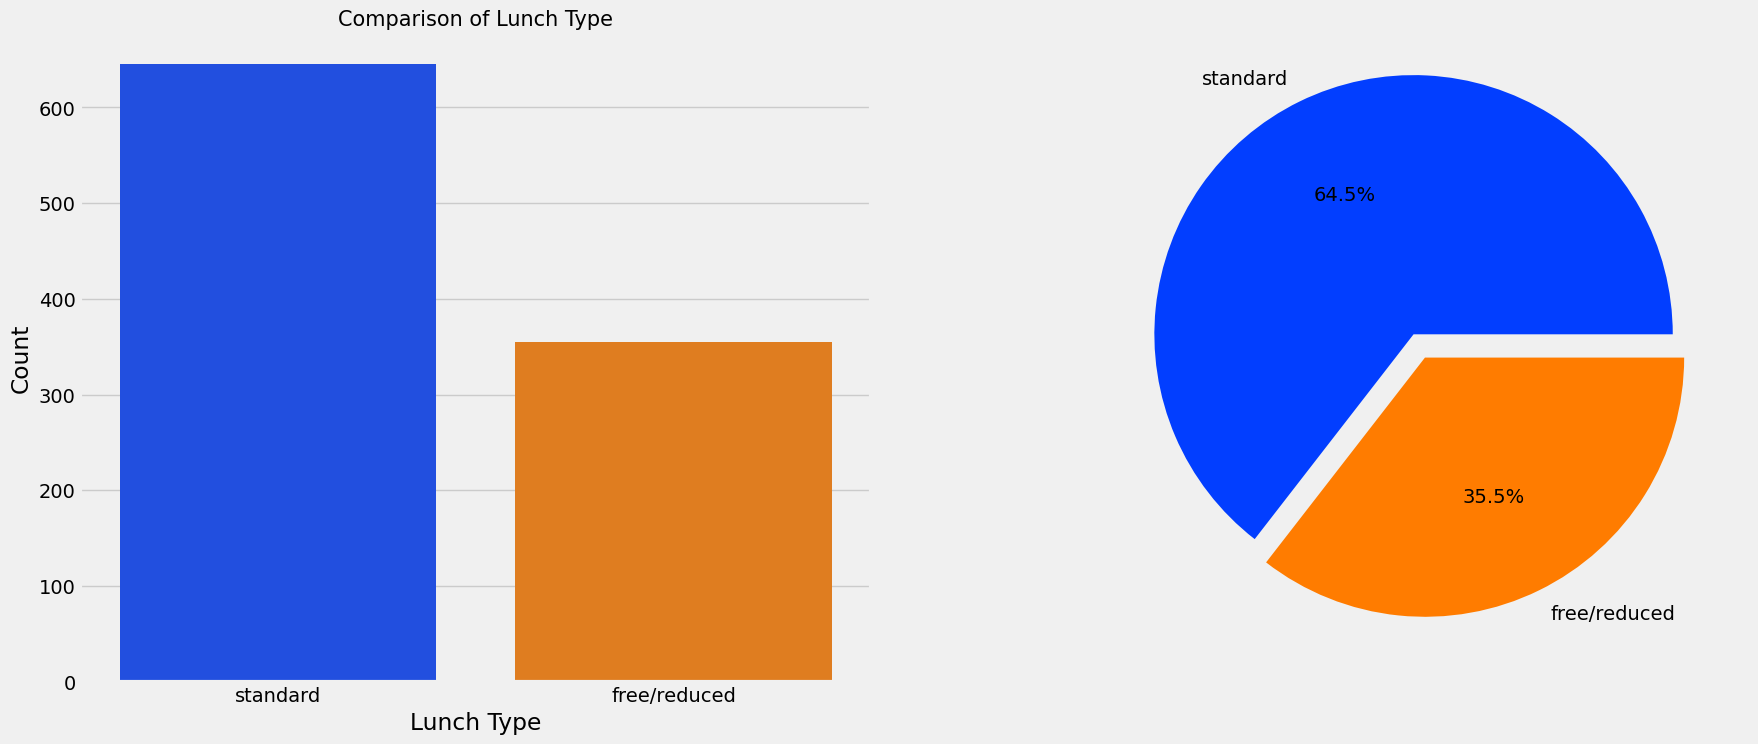

In [68]:
plt.rcParams['figure.figsize'] =(15,9)
plt.style.use('seaborn-dark-palette')
plt.subplots(1,2,figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x=df['lunch'],palette='bright')
plt.title('Comparison of Lunch Type', fontweight = 30, fontsize = 15)
plt.xlabel('Lunch Type')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(x=df['lunch'].value_counts().values,labels=df['lunch'].value_counts().index,autopct='%1.1f%%',colors=sns.color_palette('bright')[0:len(df['lunch'].unique())],explode=[0.1,0])

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

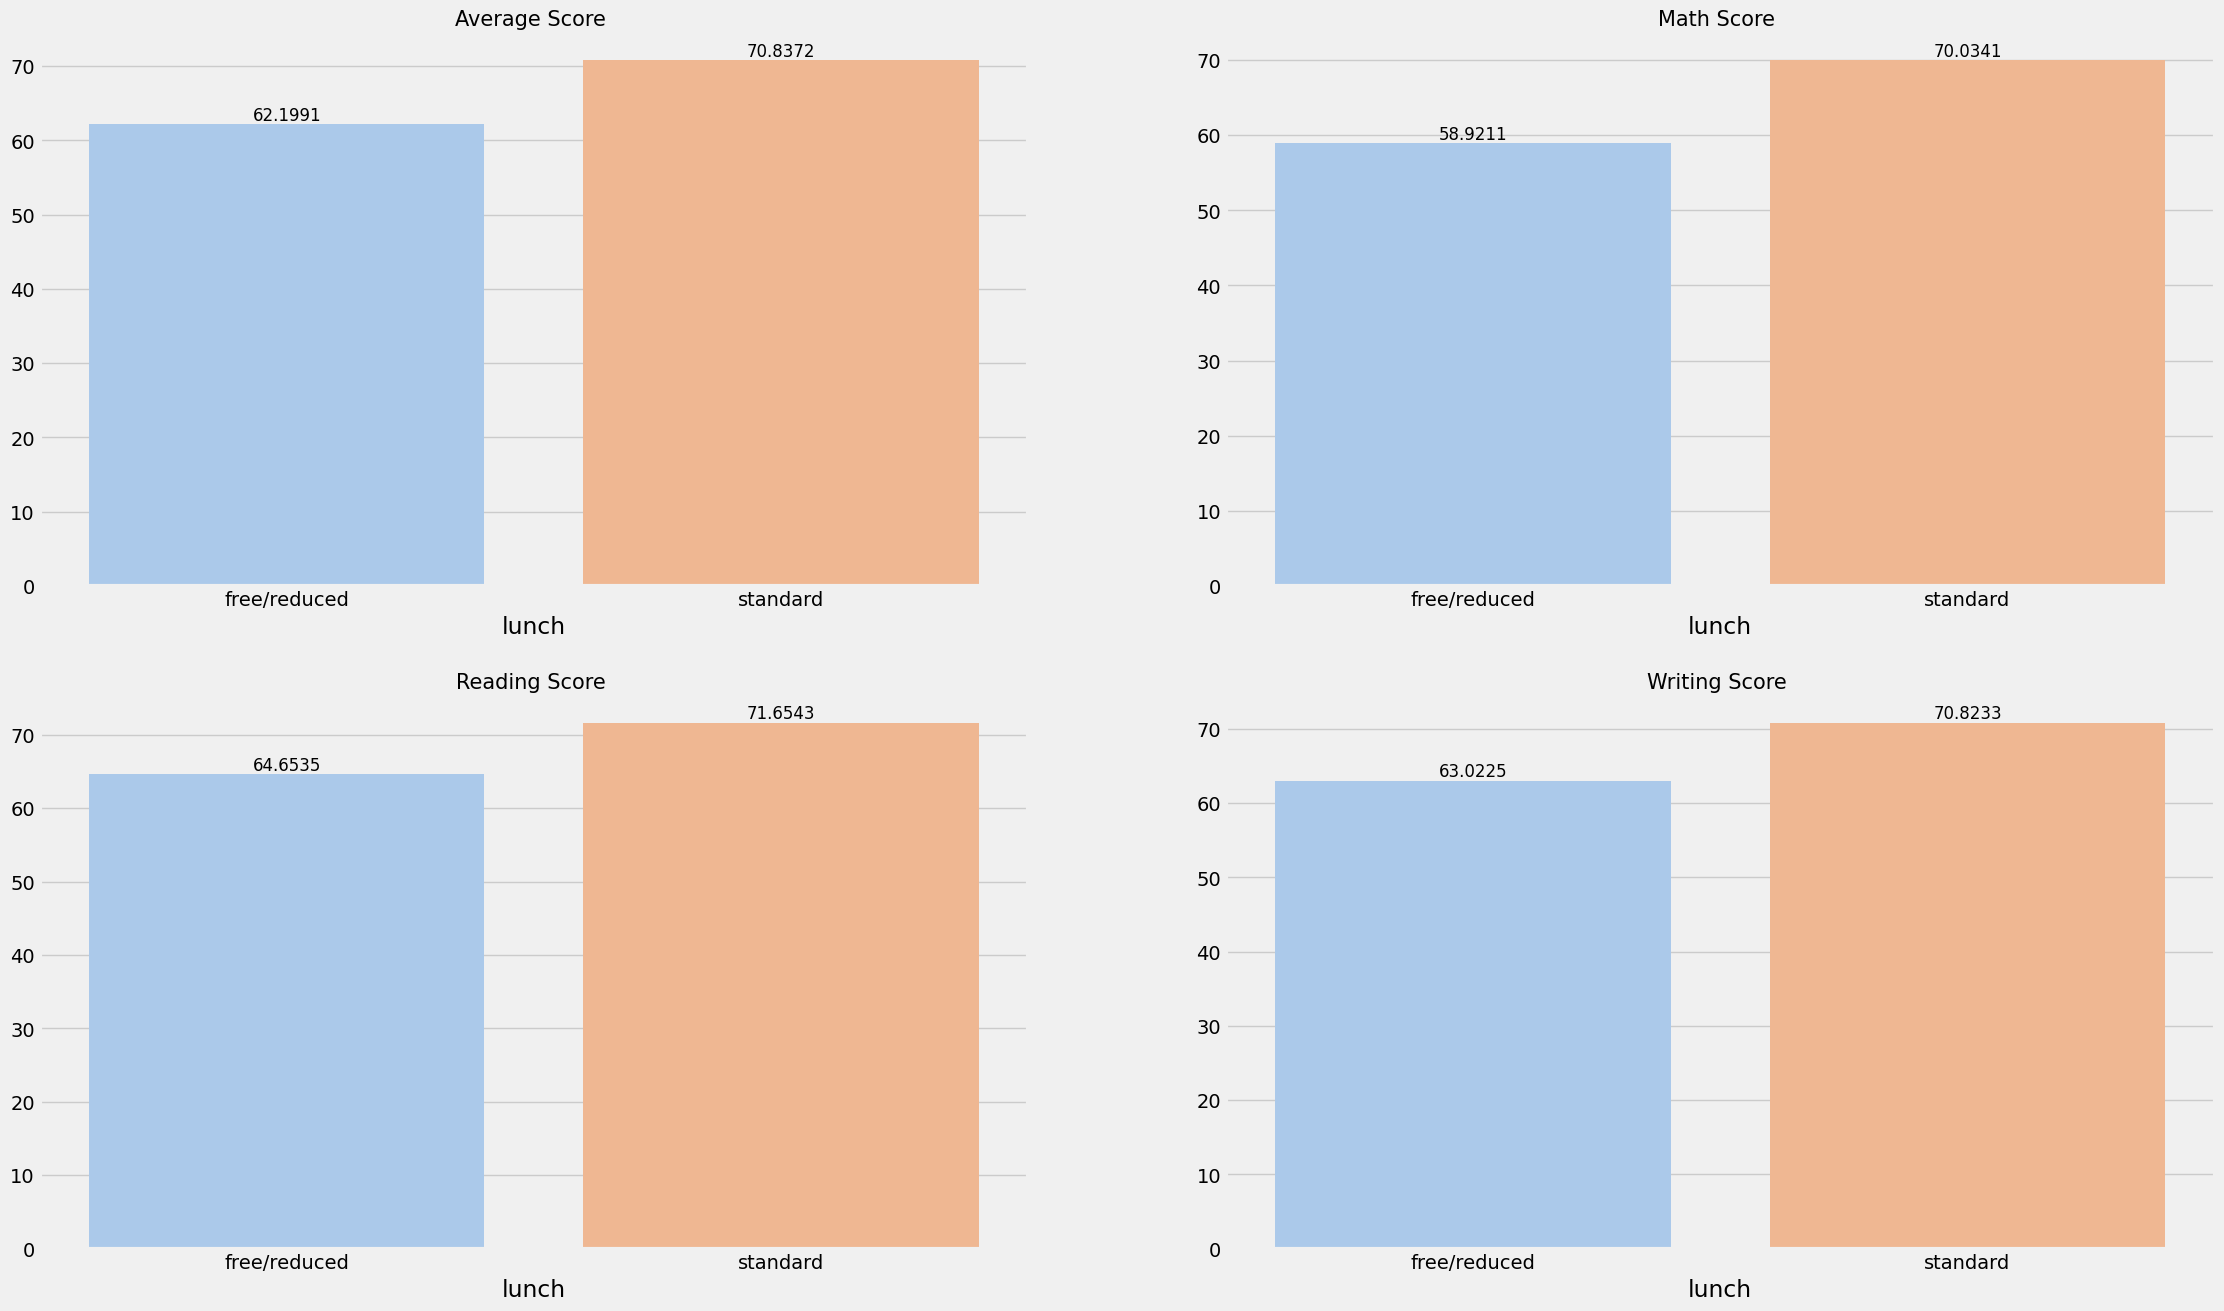

In [69]:
group =df.groupby('lunch')
d,ax =plt.subplots(2,2,figsize=(25,15))



sns.barplot(x=group['average_score'].mean().index ,y =group['average_score'].mean().values,palette ='pastel',ax =ax[0][0])
ax[0][0].set_title('Average Score ',color='black',fontsize=15)
for container in ax[0][0].containers:
    ax[0][0].bar_label(container,color='black',size=12)

sns.barplot(x=group['math_score'].mean().index,y=group['math_score'].mean().values,palette= 'pastel',ax =ax[0][1])
ax[0][1].set_title('Math Score ',color='black',fontsize=15)
for container in ax[0][1].containers:   
    ax[0][1].bar_label(container,color='black',size=12)

sns.barplot(x=group['reading_score'].mean().index, y =group['reading_score'].mean().values,palette ='pastel',ax =ax[1][0])
ax[1][0].set_title('Reading Score ',color='black',fontsize=15)
for container in ax[1][0].containers:
    ax[1][0].bar_label(container,color='black',size=12)

sns.barplot(x=group['writing_score'].mean().index,y=group['writing_score'].mean().values,palette= 'pastel',ax =ax[1][1])
ax[1][1].set_title('Writing Score ',color='black',fontsize=15)
for container in ax[1][1].containers:   
    ax[1][1].bar_label(container,color='black',size=12)

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of course is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing_score'>

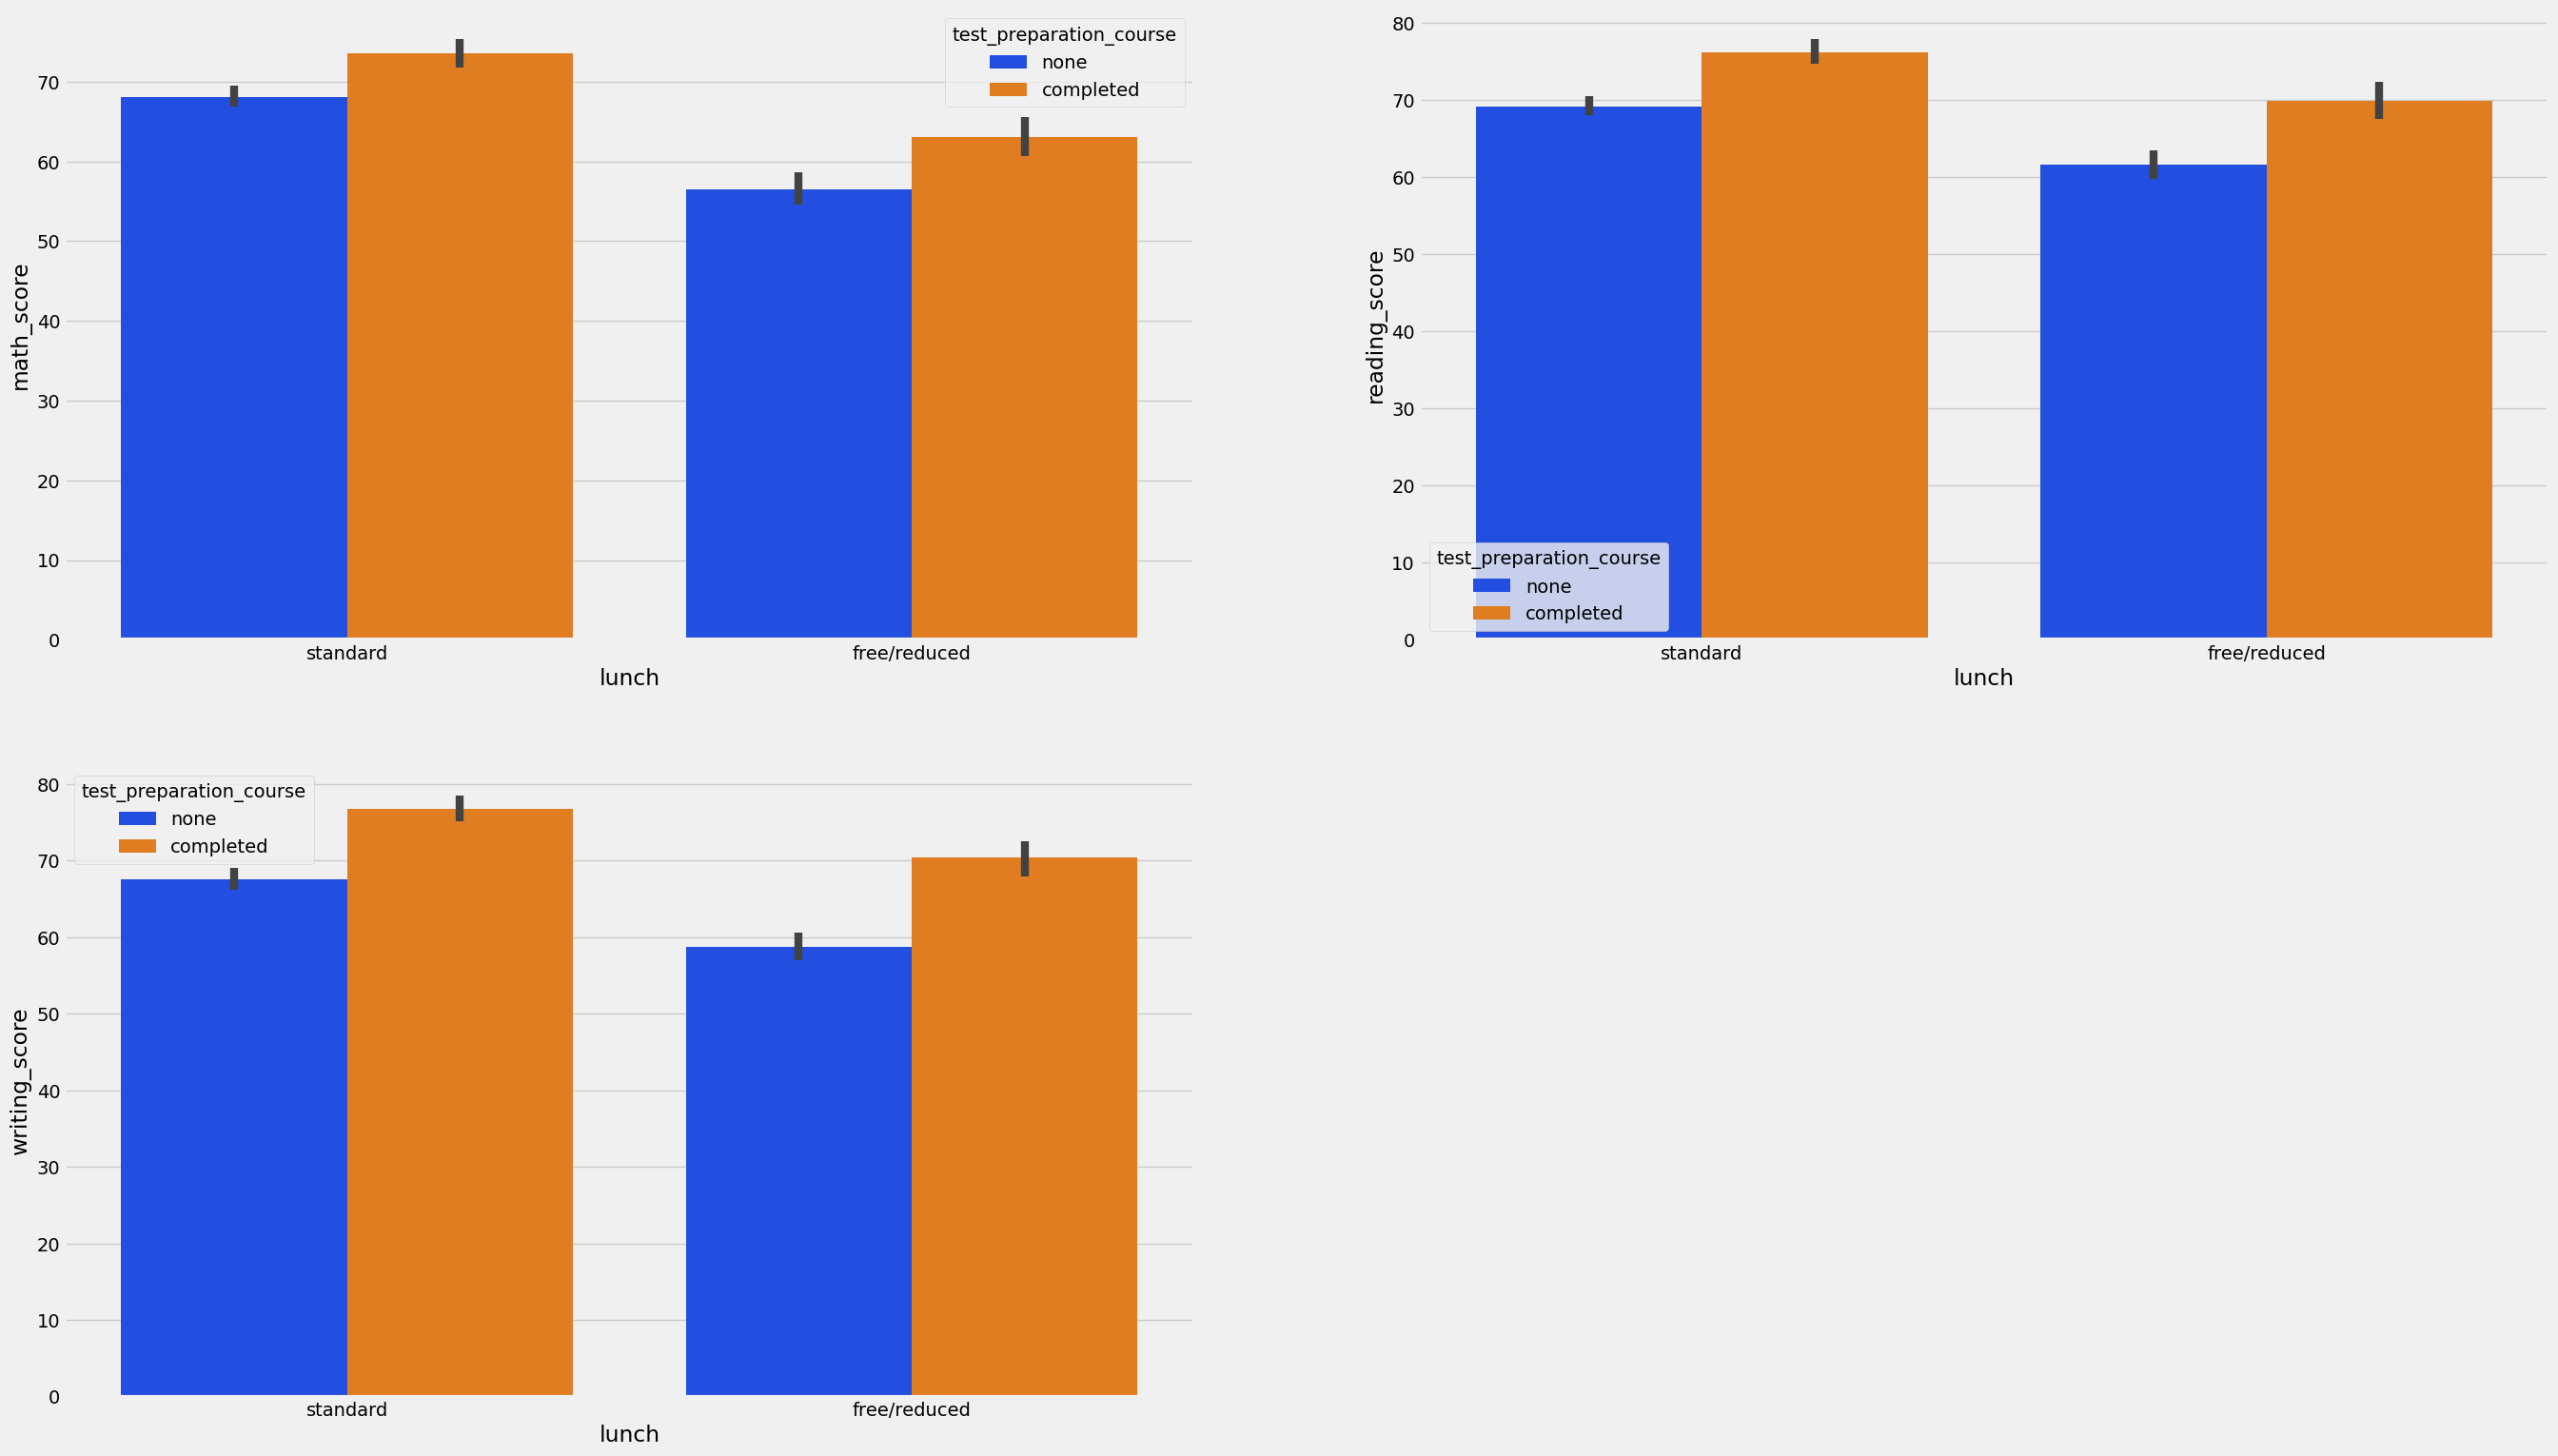

In [89]:
plt.figure(figsize=(30,18))

plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'],palette='bright')
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'],palette='bright')
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'],palette='bright')



#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

<Axes: ylabel='average_score'>

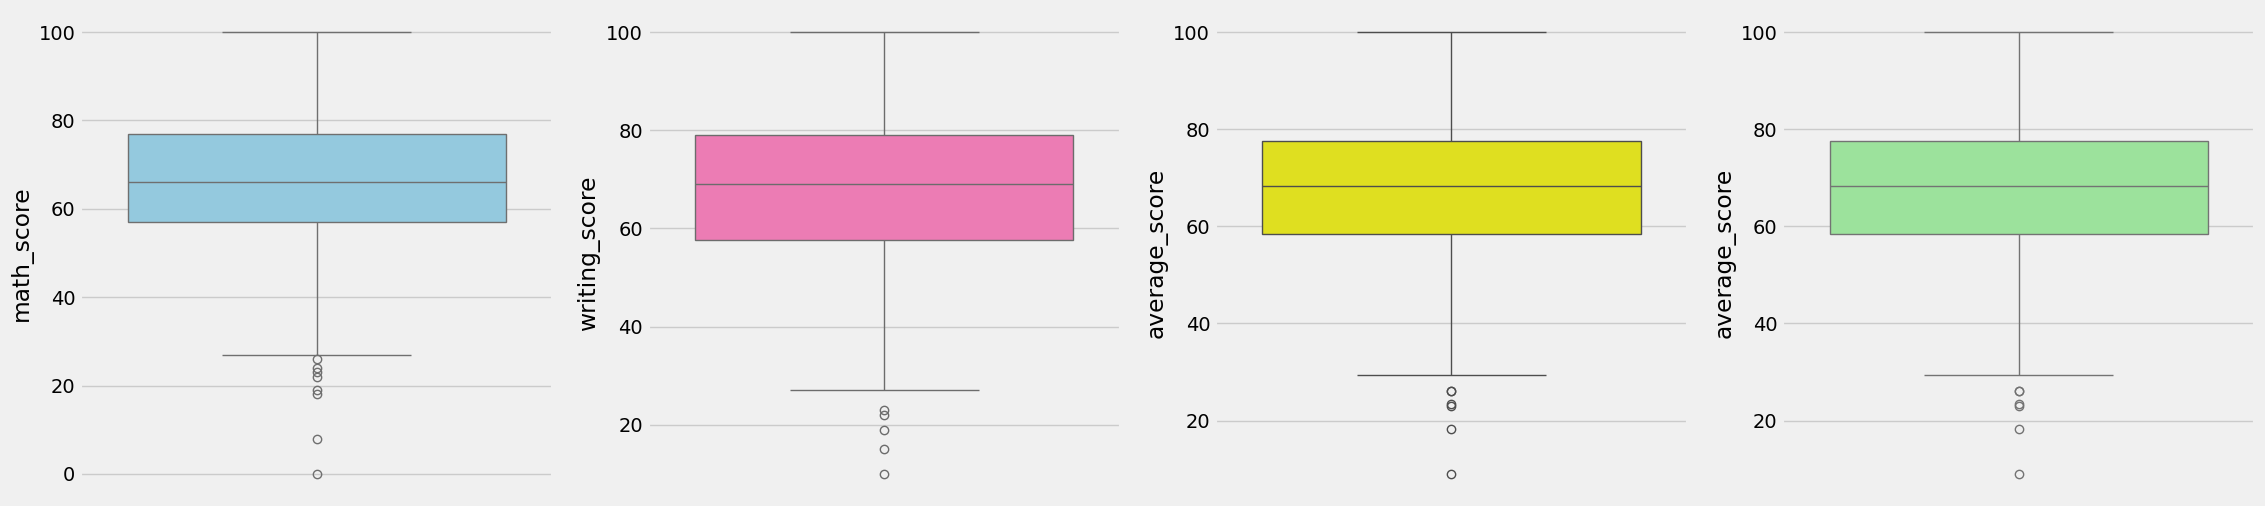

In [71]:
plt.subplots(1,4,figsize=(25,6))
plt.subplot(141)
sns.boxplot(data=df,y='math_score',color='skyblue')
plt.subplot(142)
sns.boxplot(data=df,y='writing_score',color='hotpink')
plt.subplot(143)
sns.boxplot(data=df,y='average_score',color='yellow')
plt.subplot(144)
sns.boxplot(data=df,y='average_score',color='lightgreen')

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

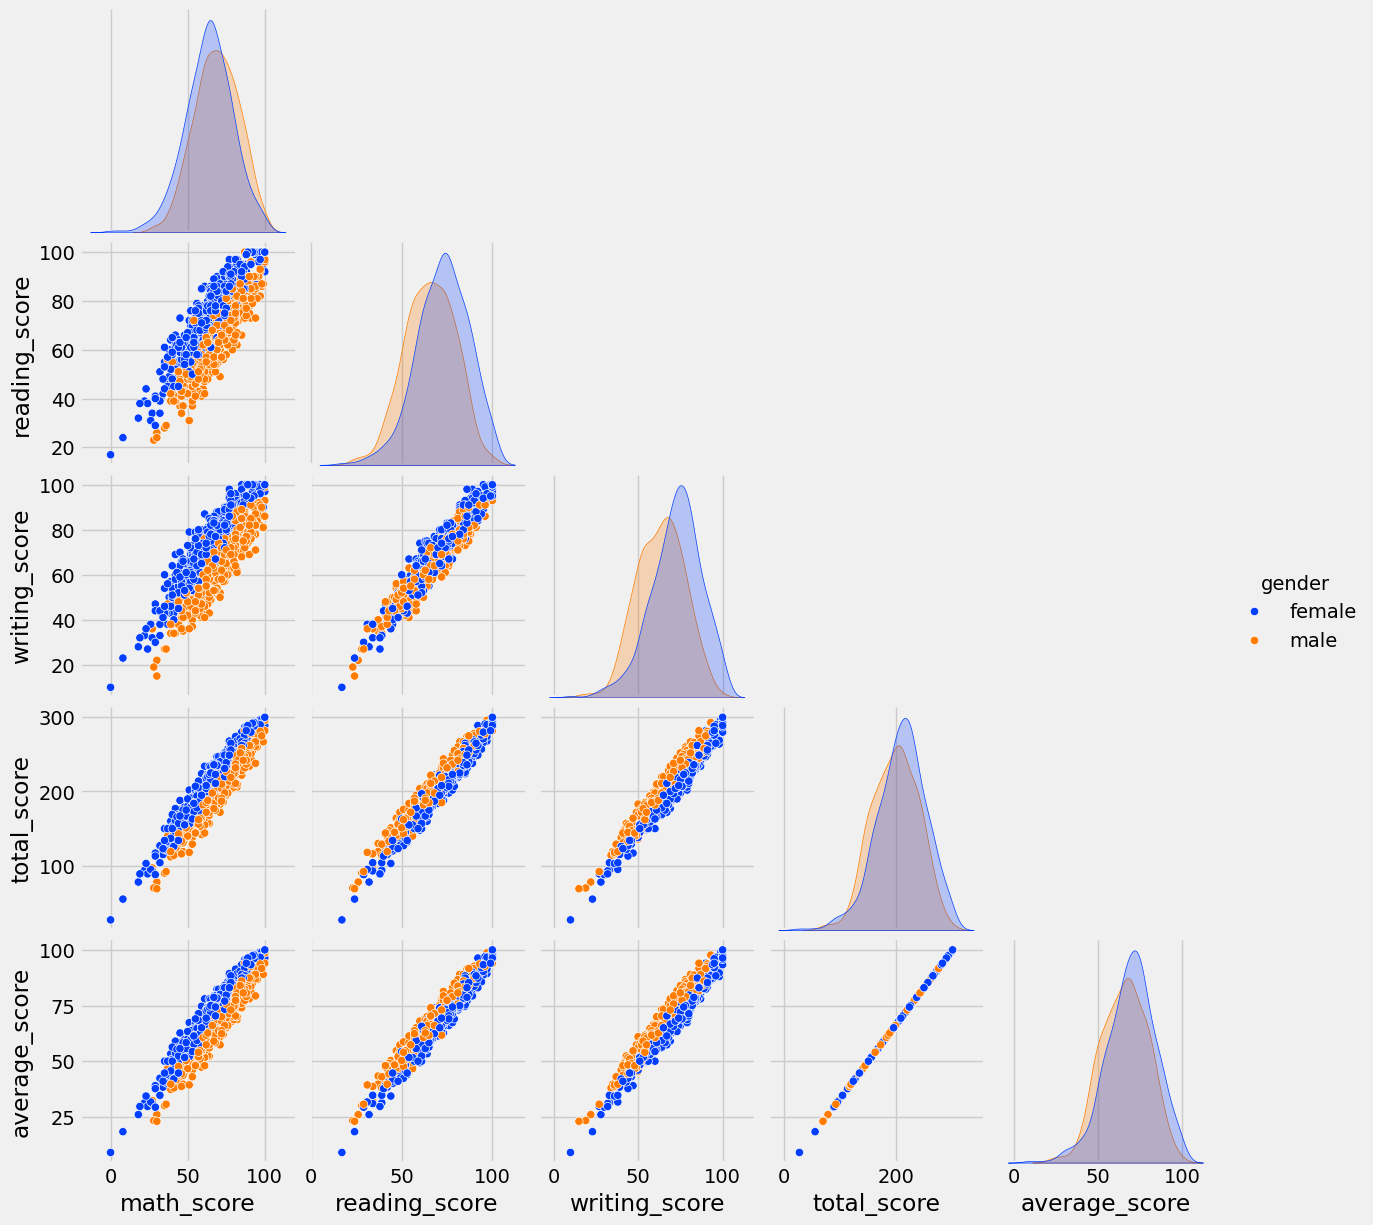

In [72]:
sns.pairplot(df,hue = 'gender',palette='bright',corner=True)
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.